## Walkthrough of the WZS project

This notebook will explain how to use all modules contained in this project for analysis, using the ipython notebook to allow the user to run code and test different methods for creating new LP problems.  For a general overview of the project, or for information on running automated scripts, see README.md 

The modules this document will cover are:
- rankLP.py
- emailnotice.py
- examples.dfxxx

In [1]:
%pylab inline
import pandas as pd
import re
from pulp import GLPK, PULP_CBC_CMD
import time

scriptStartTime = time.time()

Populating the interactive namespace from numpy and matplotlib


### importing rankLP module

In [2]:
import rankLP as rlp

### examples.dfxxx

The following line of code imports an already pre-processed pandas dataframe (df), corresponding to the kind of data we need for solving the LP problem we will be creating.

In [3]:
from examples.df929 import df

category [30010303] fenlei [沐浴乳 露]
Total rows (M) before preprocessing: 147


## Customize analysis

Here are some options to customize an analysis:

- preprocessing the df further

In [4]:
df = rlp.normalizeColumns(df)   ##converts all integers to a range of numbers between (0,1)
df = rlp.flipRankCols(df)       ##makes high ranks (like 1524) into low numbers, low ranks (like 7) into high numbers

- change the lower/upper bounds, pass as arguments to the forceSolution function

In [5]:
#lboundA =                       ##default .01      ##copy this: lbound_a=lboundA
uboundA = 10                      ##default 10      ##copy this: ubound_a=uboundA
lboundV = 1                      ##default .01      ##copy this: lbound_v=lboundV
uboundV = 100                      ##default 100      ##copy this: ubound_v=uboundV

### Start solving LP problems

specify solving method (add more here for whichever methods are installed)

In [6]:
solver=PULP_CBC_CMD()                      #default, comes with pulp
#solver=GLPK()

First, solve by pages and pageset.  We'll do this first since the examples.df929 dataframe contains a column "page", which we'll need to drop when solving by product.  Note that this column is not used in solving -- it's only used to understand how to define the conditions in the LP problem.  

The forceSolution() function will keep sampling from df until it finds a solution, starting with the entire product set (M products), then sampling (M-1) products, then sampling (M-2) products, and so forth until a solution is found.  These solutions will be reported on in images/Mdistributions.png

In [7]:
prob_page = rlp.forceSolution(df, by="page", solver=solver, ubound_a=uboundA, lbound_v=lboundV, ubound_v=uboundV)

##Define a custom page set here
pageset = {1:range(1,2), 2:range(2,4), 3:range(4,8)}
prob_pageset = rlp.forceSolution(df, by="pageset", solver=solver, c=pageset, ubound_a=uboundA, lbound_v=lboundV, ubound_v=uboundV)
##
##  Note: only define the first pagesets.  The tail will be captured by the rankByPageset() function

Now, solve by product, forcing product scores to monotonically decrease.

In [8]:
###remove page feature
df = df.drop("page", axis=1)

prob_prod = rlp.forceSolution(df, by="product", solver=solver, ubound_a=uboundA, lbound_v=lboundV, ubound_v=uboundV)

### Visualize the results

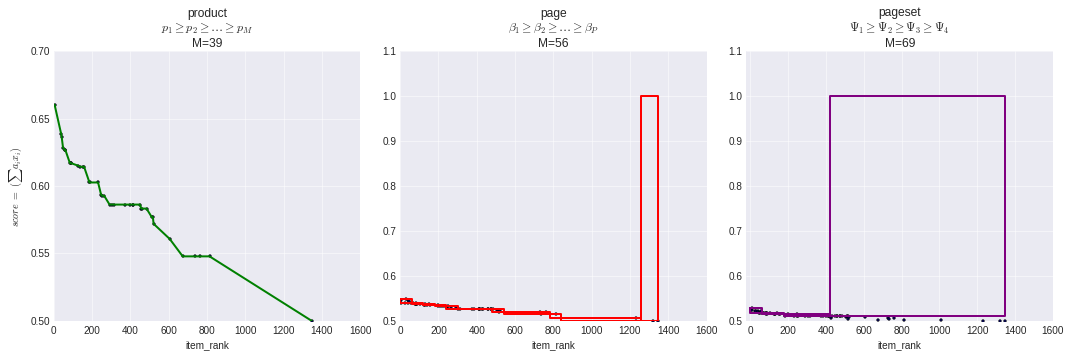

In [9]:
rlp.plotSolutions(prob_prod, prob_page, prob_pageset, pageset, lboundV)

In [10]:
print "time to execute script: %.1f seconds" % (time.time() - scriptStartTime)

time to execute script: 50.8 seconds


If doing ad-hoc analysis, visualize the values for $a_i$, $b_i$, $c_i$, or $v_i$ of a given problem-type

In [24]:
rlp.viewAs(prob_page)
#rlp.viewBs(prob_prod)
#rlp.viewCs(prob_prod)
rlp.viewVs(prob_page)
#rlp.viewAll(prob_prod)

a__DOVE 	= 0.01
a__HAZELINE 	= 8.1363608
a__LIFEBUOY 	= 6.460859
a__LUX 	= 0.01
a__LYNX 	= 10.0
a__agg02 	= 10.0
a__agg04 	= 0.01
a__agg07 	= 5.9959182
a__agg09 	= 2.1590767
a__agg10 	= 8.3602956
a__agg11 	= 10.0
a__agg12 	= 0.01
a__agg13 	= 0.01
a__agg14 	= 0.01
a__agg15 	= 0.01
a__agg16 	= 0.01
a__agg17 	= 0.01
a__allcomments 	= 0.01
a__c26 	= 0.14306731
a__c28 	= 0.01
a__c30 	= 0.01
a__c34 	= 0.086273189
a__c45 	= 0.01
a__currentprice 	= 0.17700276
a__featagg01 	= 0.012043681
a__featagg013 	= 0.01
a__featagg02 	= 10.0
a__featagg03 	= 0.01
a__featagg033 	= 0.01
a__featagg04 	= 0.01
a__featagg043 	= 0.018421462
a__featagg05 	= 0.01
a__featagg053 	= 0.01
a__featagg07 	= 0.01
a__featagg073 	= 0.01
a__featagg08 	= 10.0
a__hasAttr00 	= 10.0
a__hasAttr01 	= 2.4850981
a__hasAttr02 	= 0.01
a__hasAttr03 	= 10.0
a__hasAttr04 	= 9.8468802
a__hasAttr05 	= 5.0428064
a__hasAttr06 	= 9.9934668
a__is_in_stock 	= 6.0165386
a__medium_comment_num 	= 0.01
a__negative_comment_num 	= 0.01
a__positive_comm

Optionally, you can pass the viewAs method a threshold to restrict those values which are _above_ the threshold.

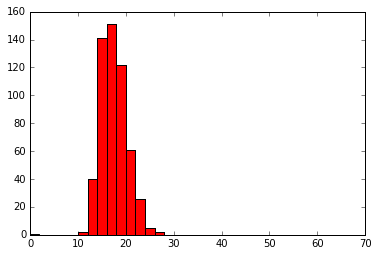

In [41]:
msg = "LP solution script finished!\n\n Counts of solutions for each product type given in bins of [0,2,4,...,68,70]\n"
for probtype in ["prod", "page","pageset"]:
    msg += "\nSolutions and important attributes for %s:\n\n" % probtype
    n, bins, plot = hist(Mprod, range=(0,70), bins=35)
    msg += str(n)+"\n\n"
    for k in sorted(importanceDict["prod"], key=importanceDict["prod"].get, reverse=True):
        msg += "%s:\t%i\n" % (k,importanceDict["prod"][k]) 

In [11]:
reload(rlp)

<module 'rankLP' from 'rankLP.py'>